<a href="https://colab.research.google.com/github/victor1cg/Python/blob/master/Lab1_Introduction_to_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Introduction to Numpy

In this first lesson, we familiarize with an important data-science library: <a href="./product/download.html" target="_top">numpy</a>. <br>
Numpy allows you to work with *arrays* and *matrices* easily, and it offers several already-implemented functions. <br> 
As the developers say "NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more"  
-https://docs.scipy.org/doc/numpy-1.10.1/user/whatisnumpy.html.

The lesson is organized as follows:


1.   Overview to numpy functionalities 
2.   Exercises





# Part 1: Introduction to numpy

We need to import the library. By default, the numpy library is already installed in Google Colab Notebook. <br>
Usually, we rename the numpy library as *np*: this notation is widely used in most online repositories.

In [ ]:
import numpy as np

Numpy is also very efficient. 
Let's run through an example showing how powerful NumPy is. Suppose we have two lists a and b, consisting of the first 100,000 non-negative numbers, and we want to create a new list c whose ith element is a[i] + 2 * b[i].

Without NumPy:

In [ ]:
%%time 
#if you write the previous line in your cell, it prints you the execution time

##generate a list of numbers [0: 10000[
a = list(range(100000))
b = list(range(100000))

CPU times: user 6.7 ms, sys: 1.93 ms, total: 8.63 ms
Wall time: 11.4 ms


In [ ]:
%%time

#we do some operations between the two lists:
# c = a + 2 * b
for _ in range(10):
    c = []
    for i in range(len(a)):
        c.append(a[i] + 2 * b[i])

CPU times: user 311 ms, sys: 27.6 ms, total: 339 ms
Wall time: 348 ms


We now do the same with Numpy.

In [ ]:
%%time
a = np.arange(100000)
b = np.arange(100000)

CPU times: user 4.45 ms, sys: 0 ns, total: 4.45 ms
Wall time: 4.92 ms


In [ ]:
%%time
for _ in range(10):
    c = a + 2 * b

CPU times: user 5.41 ms, sys: 614 µs, total: 6.02 ms
Wall time: 8.75 ms


The result is 10 to 15 times (sometimes more) faster, and we could do it in fewer lines of code (and the code itself is more intuitive)! <br>
Regular Python is much slower due to type checking and other overhead of needing to interpret code and support Python's abstractions. <br>

For example, if we are doing some addition in a loop, constantly type checking in a loop will lead to many more instructions than just performing a regular addition operation. NumPy, using optimized pre-compiled C code, is able to avoid a lot of the overhead introduced.
<br>
The process we used above is **vectorization**. Vectorization refers to applying operations to arrays instead of just individual elements (i.e. no loops).

In general, list can contain eterogeneous data, while this is not true for numpy array.

In [ ]:
list_eter = ["ciao", 1, True]
list_eter

['ciao', 1, True]

In [ ]:
np.array(["ciao", 1, True])

array(['ciao', '1', 'True'], dtype='<U4')

Why vectorize?
1. Much faster
2. Easier to read and fewer lines of code
3. More closely assembles mathematical notation

Vectorization is one of the main reasons why NumPy is so powerful.

### ndarray

ndarrays, n-dimensional arrays of homogenous data type, are the fundamental datatype used in NumPy. As these arrays are of the same type and their size is fixed at creation time, they offer less flexibility than Python lists, but can be substantially more efficient runtime and memory-wise. (Python lists are arrays of pointers to objects, adding a layer of indirection.)

The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

In [ ]:
# Can initialize ndarrays with Python lists, for example:
a = np.array([1, 2, 3])   # Create a rank 1 array
print('type:', type(a))   # Prints "<class 'numpy.ndarray'>"
print('shape:', a.shape)  # Prints "(3,)"
print('a:', a)            # Prints "1 2 3"

a_cpy= a.copy()
a[0] = 5                  # Change an element of the array
print('a modified:', a)  # Prints "[5, 2, 3]"
print('a copy:', a_cpy)

b = np.array([[1, 2, 3],
              [4, 5, 6]])         # Create a rank 2 array
print('shape:', b.shape)          # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])  # Prints "1 2 4"

type: <class 'numpy.ndarray'>
shape: (3,)
a: [1 2 3]
a modified: [5 2 3]
a copy: [1 2 3]
shape: (2, 3)
1 2 4


There are many other initializations that NumPy provides:

In [ ]:
a = np.zeros((2, 2))   # Create an array of all zeros
print(a)               # Prints "[[ 0.  0.]
                       #          [ 0.  0.]]"

b = np.full((2, 2), 7)  # Create a constant array
print(b)                # Prints "[[ 7.  7.]
                        #          [ 7.  7.]]"

c = np.eye(2)         # Create a 2 x 2 identity matrix
print(c)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

d = np.random.random((2, 2))  # Create an array filled with random values
print(d)                      # Might print "[[ 0.91940167  0.08143941]
                              #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.20786076 0.41680493]
 [0.34877902 0.51301491]]


How do we create a 2 by 2 matrix of ones?

In [ ]:
a = np.ones((2, 2))    # Create an array of all ones
print(a)               # Prints "[[ 1.  1.]
                       #          [ 1.  1.]]"

[[1. 1.]
 [1. 1.]]


Sometimes, we need to *reshape* our arrays, i.e., to change its dimension. <br>
For example, if we have a one dimension array $x$, where $|x|=8$, we can reshape it in a 2D array (i.e., matrix) with two columns and four rows or, vice-versa, four columns and two rows. 

In [ ]:
nums = np.arange(8) #create an array [0, 7]
print(nums) #see the array
print(nums.shape) #see the shape

#reshape
nums2 = nums.reshape((2, 4)) # 2 rows, 4 columns
nums3 = nums.reshape((4, 2)) # 4 rows, 2 columns

print("nums2:\n", nums2)
print("nums3:\n", nums3)

[0 1 2 3 4 5 6 7]
(8,)
nums2:
 [[0 1 2 3]
 [4 5 6 7]]
nums3:
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]


NumPy supports an object-oriented paradigm, such that ndarray has a number of methods and attributes, with functions similar to ones in the outermost NumPy namespace. For example, we can do both:


In [ ]:
nums = np.arange(8)
print(nums)
print(nums.min())     # Prints 0
print(np.min(nums))   # Prints 0
print(np.reshape(nums, (4, 2))) #change how the array looks like

[0 1 2 3 4 5 6 7]
0
0
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [ ]:
m = np.array([[1, 2], [4, 5]])
print(m)

print(m.T)

print(np.linalg.inv(m))

[[1 2]
 [4 5]]
[[1 4]
 [2 5]]
[[-1.66666667  0.66666667]
 [ 1.33333333 -0.33333333]]


In [ ]:
#or we can access to only some numbers
print(m)
print(m[0, :]) #print first row
print(m[:, 1]) #print second col

n = np.array([1, 2, 3, 4, 5])
print(n[2: 4])#print from the 2-nd to the 4-th

[[1 2]
 [4 5]]
[1 2]
[2 5]
[3 4]


In [ ]:
#can we stack two arrays together? given two 1D array, we obtain a 2D matrix
a = np.array([[1, 2, 3]])
b = np.array([[1, 2, 3]])
print(np.vstack((a, b, a)))
print(np.hstack((a, b, a)))

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 2 3 1 2 3 1 2 3]]


### Array Operations/Math

NumPy supports many elementwise operations:

In [ ]:
#define two matrixes: x and y
x = np.array([[1, 2],
              [3, 4]], dtype=np.float64)
y = np.array([[5, 6],
              [7, 8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
#np.array_equal tells us if two np array are equal
print(np.array_equal(x + y, np.add(x, y)))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(np.array_equal(x - y, np.subtract(x, y)))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(np.array_equal(x * y, np.multiply(x, y)))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

print(x ** 2)
print(x ** 3)

True
True
True
[[1.         1.41421356]
 [1.73205081 2.        ]]
[[ 1.  4.]
 [ 9. 16.]]
[[ 1.  8.]
 [27. 64.]]


How do we elementwise divide between two arrays?

In [ ]:
x = np.array([[1, 2], [3, 4]], dtype=np.float64)
y = np.array([[5, 6], [7, 8]], dtype=np.float64)

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x)
print(y)
print(x / y)
print(np.divide(x, y))

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


Note * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])

v = np.array([9, 10])
w = np.array([11, 12])

# Inner product of vectors; 
# (9 * 11) + (10 * 12)
# expected dimension? (1, 2) X (2 , 1) --> (1)
#both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
# expected dimension? (2, 2) x (2, 1) --> (2, 1) 
# [(1 * 9 + 2 * 10), (3 * 9 + 4 * 10)]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y) # @ is another way to do a matrix product

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [ ]:
#we must be careful with matrix products!
a = np.array([[1, 2], [2, 4]])
print(a)
print()
b = np.array([[1, 2, 2, 1], [2, 4, 2, 1], [2, 4, 2, 1]])
print(b)
a.dot(b)

[[1 2]
 [2 4]]

[[1 2 2 1]
 [2 4 2 1]
 [2 4 2 1]]


ValueError: ignored

There are many useful functions built into NumPy, and often we're able to express them across specific axes of the ndarray:

In [ ]:
x = np.array([[1, 2, 3], 
              [4, 5, 6]])

print(x, "\n\n")

print(np.sum(x))          # Compute sum of all elements; prints "21"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[5 7 9]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[6 15]"

print()

print(np.max(x, axis=0))  # Compute max of each column; prints "[4 5, 6]" 
print(np.max(x, axis=1))  # Compute max of each row; prints "[3 6]" 


[[1 2 3]
 [4 5 6]] 


21
[5 7 9]
[ 6 15]

[4 5 6]
[3 6]


How can we compute the index of the max value of each row? <br>
Useful, to say, find the class that corresponds to the maximum score for an input image.

In [ ]:
x = np.array([[1, 2, 3], 
              [4, 5, 6]])

print(np.argmax(x, axis=1)) # Compute index of max of each row; prints "[2 2]"

[2 2]


We can also apply also boolean operators in our ndarray. <br>
For example, we might want to find all numbers greater than 5.

In [ ]:
x = np.array([1, 2, 3, 7, 8, 9, 4, 5, 4])
print(x > 5) # a list of elementwise comparisons
print(x[x > 5]) #we can access our vector elements with boolean indexes

[False False False  True  True  True False False False]
[7 8 9]


## Part 2: Exercises

### Exercise 2.1: Find the minimum

As we previously introduced, numpy provides several optimized function to work with ndarrays. In this exercise, we ask you to do the follow:


1.   Define a function $f(n)$ that returns a numpy one dimension array of random numbers, where $n$ is the array size of the array.
2.   Write a script that sums the values contained in the array. Print the execution time. 
3.   Use a numpy function that sums the values contained in the array. Print the execution time. Check that the function you wrote in the previous point returns the same value as the numpy function. 

For the points 2 and 3, execute the sum where $n = 100000$. Compare the execution time of both approaches. 

How can we have same results across different execution? If we use randomic functions, we can't control the output, and your results will differ from your collegues ones. How can we avoid it? We can set a seed. For example, consider the following example:

    
        def generate_random():
            np.random.seed(123) #the randomic seed is set
            return np.random.random()
    
If you call the following function several times, the result will always be the same. Be careful on how, and expetially *where* you place the seed. In our exercises, we always set the seed to 123.


In [ ]:
## version 1
def generate_random():
    np.random.seed(123) #seed inside a function
    return np.random.random()

print(generate_random(), generate_random(), generate_random())


## version 2
def generate_random2():
    return np.random.random()

np.random.seed(123) #seed outside a function
print(generate_random2(), generate_random2(), generate_random2())

0.6964691855978616 0.6964691855978616 0.6964691855978616
0.6964691855978616 0.28613933495037946 0.2268514535642031


In [ ]:
#
# Complete ex 2.1.1 here
#

#place the following line inside your function, in this way we avoid randomness
# np.random.seed(123) #<-- this function sets a seed to allow reproducibility. In this way, the "randomness" is under our control.  

In [ ]:
#
# Complete ex 2.1.2 here
#

In [ ]:
#
# Complete ex 2.1.3 here
#

### Exercise 2.2:

Write a numpy program to compute the sum of the diagonal element of a given array.

We ask you to provide two solutions:


1.   Write your own script to solve the problem.
2.   Find the one-line solution from the official <a href= "https://numpy.org/doc/stable/index.html">numpy</a> documentation. Learning to use the documentation of libraries is fundamental in data science. 



In [ ]:
### define a matrix
np.random.seed(123) #<-- this function sets a seed to allow reproducibility. In this way, the "randomness" is under our control.  
m = np.random.random((10, 10)) #create a randomic 10 X 10 matrix

In [ ]:
#
# Complete ex 2.2.1 here
#

In [ ]:
#
# Complete ex 2.2.2 here
#

### Exercise 2.3: Linear Regression

We now conclude the laboratory with an hard exercise. <br>
We apply the knowledge we had so far to solve a real (simple) task: given the current speed of a car, predict the distance needed to reach a complete stop. <br>
<br>
To solve the task, we use linear regression. <br>
The linear regression is defined as follows: <br>

$Y = \beta_0 + \beta_1 X + \epsilon$

where:


*   $\beta_0$ is the intercept
*   $\beta_1$ is the slope of the linear regression





In [ ]:
# we start by importing some useful libraries
import pandas as pd #pandas manages our datasets (e.g., csv)
import numpy as np #our friend, numpy

# get two graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import the dataset
data_url = 'https://raw.githubusercontent.com/cmdlinetips/data/master/cars.tsv' #we define the url
cars = pd.read_csv(data_url, sep="\t") #pandas allows us to import dataset from url. The rows are separated by the tab. 

#with the function head we can see the first 5 rows of the dataset 
#from the output, we can see that the variable cars is organized as a csv file
cars.head() 

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [ ]:
## we can easily access to the columns as follows
print(cars.head()["speed"])

0    4
1    4
2    7
3    7
4    8
Name: speed, dtype: int64


Text(0.5, 0, 'Speed (mph)')

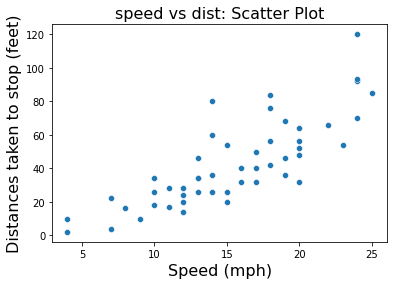

In [ ]:
#we can now use our visualizing tools to plot the data
bplot= sns.scatterplot(x = 'speed', y = 'dist',data=cars) #define the type of plot
bplot.axes.set_title("speed vs dist: Scatter Plot",
                    fontsize=16) #set the title
bplot.set_ylabel("Distances taken to stop (feet)", 
                fontsize=16) #set the x label
bplot.set_xlabel("Speed (mph)", 
                fontsize=16) #set the y label

In [ ]:
## We now can define X (the speed) to predict the distance require to stop
X = cars["speed"].values #get all the values of the "speed" column
Y = cars["dist"].values #get all the values of the "Dist" column

It's time to solve the problem.
The first thing to do is to defube a matrix containing both coefficient vectors for $\beta_0$ and $\beta_1$. <br>

To do it, you do the following:


*   create a vector $v$ containing all 1. $|v|$ is equal to the number of samples. 
*   create a matrix $(n , 2)$, where the first column is $v$, and the second column is our $X$. To complete this operation, you might use the function *np.vstack* (see numpy documentation).



In [ ]:
# beta_hat = #name of the variable containing the floating number
X_mat=np.vstack([np.ones(len(X)), X]).T 
print(X_mat[:5])

[[1. 4.]
 [1. 4.]
 [1. 7.]
 [1. 7.]
 [1. 8.]]


Use now your numpy skills to find the regression parameters. In particular, we recall the following:

$\hat{\beta} = (X^T.X)^{-1}.X^T.Y$

The variable $\hat{\beta}$ contains the estimates of the two parameters of the linear model and we computed with matrix multiplication.

In [ ]:
#
# Solve exercise 3 here
#
# beta_hat = #name of the variable containing the floating number

# if you print beta_hat, you obtain the following: array([-17.57909489,   3.93240876])

array([-17.57909489,   3.93240876])

We now know the values for $\hat{\beta}_0$ and $\hat{\beta}_1$. Can you manually predict the outcome when the speed (i.e., $x$) is set to 21?

Expected outcome: 65.00148906999999

In [ ]:
#
# Solve here
# 

65.00148906999999


Once we have estimated $\hat{\beta}$, we can compute $\hat{y}$, i.e., our estimations. 

In [ ]:
#
# Solve here
# 
#y_hat = 

We can now plot the regression solution. <br>

In [ ]:
# plot data and predictions 

## uncomment the following two lines
# plt.scatter(X, Y)
# plt.plot(X, y_hat, color='red')

We now have both $y$ (true values) and estimations $\hat{y}$ computed with our regressor. <br>
Compute the average error, defined as follows: $err = \frac{1}{n} \sum_{i = 0}^{n}(|y_i - \hat{y} |)$, where | | is the absolute value.

In [ ]:
#
# Solve here
#

error = np.sum((Y - y_hat)**2) / len(Y)
error

#if you print error, you obtain the following: 227.07042102189783

227.07042102189783